In [1]:
import pandas as pd
import numpy as np

In [2]:
customers = pd.read_csv('./OlistData/olist_customers_dataset.csv')
geolocation = pd.read_csv('./OlistData/olist_geolocation_dataset.csv')
order_items = pd.read_csv('./OlistData/olist_order_items_dataset.csv')
payments = pd.read_csv('./OlistData/olist_order_payments_dataset.csv')
reviews= pd.read_csv('./OlistData/olist_order_reviews_dataset.csv')
orders = pd.read_csv('./OlistData/olist_orders_dataset.csv')
products = pd.read_csv('./OlistData/olist_products_dataset.csv')
sellers = pd.read_csv('./OlistData/olist_sellers_dataset.csv')
product_category = pd.read_csv('./OlistData/product_category_name_translation.csv')
rfm = pd.read_csv('./OlistData/rfm.csv')

In [3]:
all_df = [customers, geolocation, order_items, payments, reviews, orders, products, sellers, product_category]
all_name = ['customers', 'geolocation', 'order_items', 'payments', 'reviews', 'orders', 'products', 'sellers', 'product_category']

In [4]:
df_cols = {}
for index,name in enumerate(all_name):
    df_cols[name] = all_df[index].columns.to_list()

In [6]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [8]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])

In [10]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [11]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [6]:
reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date']).dt.strftime('%Y-%m-%d')
reviews['review_answer_timestamp'] = pd.to_datetime(reviews['review_answer_timestamp'])

In [13]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
date_cols = [ 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date']
orders[date_cols] = orders[date_cols].apply(pd.to_datetime)


In [15]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [16]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [17]:
product_category.head(72)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


### 订单量按日分布

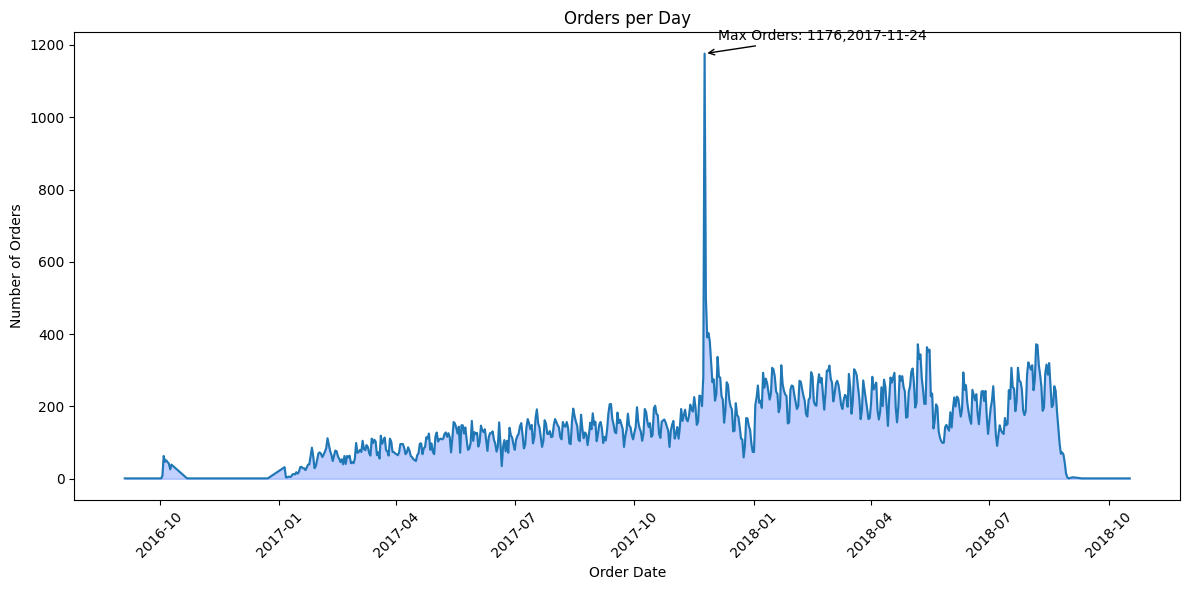

In [8]:
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  
from datetime import datetime  

df = orders
df['order_purchase_date'] = pd.to_datetime(df['order_purchase_timestamp']).dt.date
# 计算每天的订单数量  
df_daily = df.groupby('order_purchase_date')['order_id'].count().reset_index(name='order_count')  
  
# 如果需要按季度聚合，可以使用pd.Grouper和resample（注意这适用于时间序列索引）  
# 这里我们直接使用日期，因此不需要按季度聚合  
  
# 绘制折线图  
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_daily, x='order_purchase_date', y='order_count', marker='')  
plt.fill_between(df_daily['order_purchase_date'], df_daily['order_count'], color='#3366FF', alpha=0.3)
# 找到订单数量最多的日期  
max_date = df_daily.loc[df_daily['order_count'].idxmax(), 'order_purchase_date']  
  
# 标注出订单数量最多的日期  
plt.annotate('Max Orders: ' + str(df_daily['order_count'].max()) + ','+ str(max_date),   
              xy=(max_date, df_daily['order_count'].max()),   
              xytext=(10, 10),  # 文本位置  
              textcoords='offset points',  
              arrowprops=dict(facecolor='red', arrowstyle='->'))  
  
# 设置x轴标签（如果需要季度标签，则需要进行相应的转换）  
plt.xticks(rotation=45)  # 如果日期标签重叠，可以旋转它们  
plt.xlabel('Order Date')  
plt.ylabel('Number of Orders')  
plt.title('Orders per Day')  
plt.tight_layout()  
# plt.savefig('./figure/orders_per_day.png')  
plt.show()

https://baijiahao.baidu.com/s?id=1585552715307583866&wfr=spider&for=pc
黑色星期五

### 下单24h时间分布

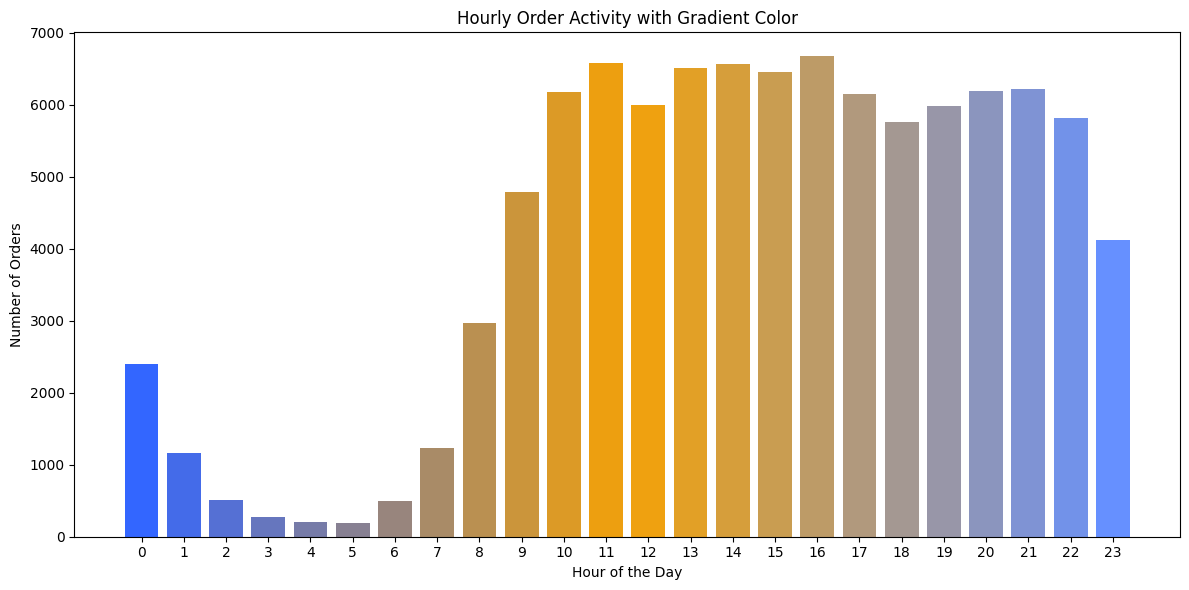

In [38]:
from matplotlib.colors import LinearSegmentedColormap

# 假设orders是包含订单数据的DataFrame
# orders = ...

# 将订单时间转换为小时
df = orders.copy()
df['order_purchase_hour'] = pd.to_datetime(df['order_purchase_timestamp']).dt.hour

# 统计每个小时段的订单数量
hourly_activity = df.groupby('order_purchase_hour').size()

# 创建渐变色
color1 = '#3366FF'
color2 = '#f5a205'
color3 = '#6690FF'
cmap = LinearSegmentedColormap.from_list('custom_cmap', [color1, color2, color3], N=hourly_activity.shape[0])

# 绘制条形图，并应用渐变色
plt.figure(figsize=(12, 6))
plt.bar(hourly_activity.index, hourly_activity.values, color=cmap(range(hourly_activity.shape[0])))
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Hourly Order Activity with Gradient Color')
plt.xticks(range(24))
plt.tight_layout()
plt.savefig('./figure/hourly_order_activity_gradient.png')
plt.show()


### 季度订单量地图

In [37]:
from pyecharts.charts import Map, Timeline
from pyecharts import options as opts
from pyecharts.globals import ChartType

orders_with_city = orders.merge(customers, on='customer_id', how='left')  

# 步骤3: 转换timestamp到季度  
orders_with_city['quarter'] = pd.to_datetime(orders_with_city['order_purchase_timestamp']).dt.to_period('Q')  

# 步骤4: 按照城市和季度聚合订单数量  
orders_by_city_quarter = orders_with_city.groupby(['customer_state', 'quarter']).size().reset_index(name='order_count')  
orders_by_city_quarter.head()

,customer_state,quarter,order_count
0,AC,2017Q1,7
1,AC,2017Q2,17
2,AC,2017Q3,14
3,AC,2017Q4,16
4,AC,2018Q1,11


In [38]:
# 获取城市唯一经纬度
unique_geolocation = geolocation.groupby('geolocation_state').agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean'
}).reset_index()

# 合并订单数据和地理位置数据
merged_data = pd.merge(orders_by_city_quarter, unique_geolocation, left_on='customer_state', right_on='geolocation_state')

# 提取城市、季度和订单数量
cities = merged_data['customer_state'].unique().tolist()
quarters = merged_data['quarter'].unique().tolist()

### 商品类别

In [61]:
merged_items = order_items.merge(products, on='product_id', how='left')
sel_list = ['product_id', 'product_category_name', 'shipping_limit_date']
merged_items = merged_items[sel_list]
merged_items['shipping_limit_date'] = pd.to_datetime(merged_items['shipping_limit_date']).dt.strftime('%Y-%m')
merged_items['quantity'] = [1] * merged_items.shape[0]

### 付款方式饼图

In [77]:
from pyecharts.charts import Pie  
from pyecharts import options as opts  
  
# 假设 payments 是一个 pandas DataFrame  
# 转换 payments DataFrame 中的 'payment_type' 列到字典中，作为饼图的数据  
data = payments.groupby('payment_type').size().reset_index(name='count').to_dict(orient='records')  
# 转换为适合 pyecharts 饼图的列表格式 [(name, value), ...]  
pie_data = [(row['payment_type'], row['count']) for row in data]  
  
# 创建饼图  
pie = Pie()  
pie.add("Payment Type", data_pair=pie_data)  
  
# 设置全局选项  
pie.set_global_opts(title_opts=opts.TitleOpts(title="Payment Type Distribution"),  
                    legend_opts=opts.LegendOpts(orient="vertical", pos_top="15%", pos_left="2%"),  
                    toolbox_opts=opts.ToolboxOpts())  
  
# 设置系列选项，包括显示标签和占比  
pie.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c} ({d}%)"))  
  
# 渲染图表到HTML文件  
pie.render('./figure/payment_type_pie_chart.html')

'D:\\GitHub\\SAS_project\\figure\\payment_type_pie_chart.html'

### 售货商分布条形图

In [79]:
import pandas as pd
from pyecharts.charts import Bar
from pyecharts import options as opts

# 假设df是已经存在的DataFrame
# df = pd.read_csv("your_data.csv")  # 如果数据来自CSV文件

# 对数据进行分组，计算每个city中的seller数量
city_counts = sellers['seller_state'].value_counts().reset_index()
city_counts.columns = ['city', 'count']

# 创建条形图
bar = Bar()
bar.add_xaxis(city_counts['city'].tolist())
bar.add_yaxis("Seller Count", city_counts['count'].tolist())

# 设置全局选项
bar.set_global_opts(title_opts=opts.TitleOpts(title="Seller Distribution by City"),
                    xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-15)),
                    datazoom_opts=opts.DataZoomOpts())

# 设置系列选项
bar.set_series_opts(label_opts=opts.LabelOpts(is_show=True))

# 渲染图表到HTML文件
bar.render('./figure/seller_distribution_by_city_bar_chart.html')


'D:\\GitHub\\SAS_project\\figure\\seller_distribution_by_city_bar_chart.html'

### 商户评分

In [87]:
review_order_items = order_items.merge(reviews, on='order_id', how='left')
review_order_items = review_order_items[['order_id', 'seller_id', 'review_score']]
review_order_items

,order_id,seller_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,5.0
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,4.0
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,5.0
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,5.0
...,...,...,...
113309,fffc94f6ce00a00581880bf54a75a037,b8bc237ba3788b23da09c0f1f3a3288c,5.0
113310,fffcd46ef2263f404302a634eb57f7eb,f3c38ab652836d21de61fb8314b69182,5.0
113311,fffce4705a9662cd70adb13d4a31832d,c3cfdc648177fdbbbb35635a37472c53,5.0
113312,fffe18544ffabc95dfada21779c9644f,2b3e4a2a3ea8e01938cabda2a3e5cc79,5.0


In [96]:
review_sellers = review_order_items.groupby('seller_id')['review_score'].mean().reset_index(name='avg_rating')
review_sellers = review_sellers.dropna(subset='avg_rating')

In [100]:
# 新增rank列，根据avg_rating映射到对应的评分区间
conditions = [
    (review_sellers['avg_rating'] >= 1) & (review_sellers['avg_rating'] < 2),
    (review_sellers['avg_rating'] >= 2) & (review_sellers['avg_rating'] < 3),
    (review_sellers['avg_rating'] >= 3) & (review_sellers['avg_rating'] < 4),
    (review_sellers['avg_rating'] >= 4) & (review_sellers['avg_rating'] <= 5)
]
choices = ['[1,2)', '[2,3)', '[3,4)', '[4,5)']
review_sellers['rank'] = pd.np.select(conditions, choices, default='Unknown')

# 计算每个评分区间的数量
rank_counts = review_sellers['rank'].value_counts().reset_index()
rank_counts.columns = ['rank', 'count']

# 创建饼图
pie = Pie()
pie.add("", [list(z) for z in zip(rank_counts['rank'], rank_counts['count'])])

# 设置全局选项
pie.set_global_opts(title_opts=opts.TitleOpts(title="Average Review Score of Sellers"),
                    legend_opts=opts.LegendOpts(orient="vertical", pos_top="15%", pos_left="2%"),
                    toolbox_opts=opts.ToolboxOpts())

# 设置系列选项，包括显示标签和占比
pie.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c} ({d}%)"))

# 渲染图表到HTML文件
pie.render('./figure/seller_rating_distribution.html')


C:\Users\18205\AppData\Local\Temp\ipykernel_2752\3527642287.py:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  review_sellers['rank'] = pd.np.select(conditions, choices, default='Unknown')


'D:\\GitHub\\SAS_project\\figure\\seller_rating_distribution.html'

### 产品品类交易量、交易额

In [110]:
order_items_cat = order_items.merge(products, on='product_id', how='left')
order_items_cat = order_items_cat[['order_id', 'product_id', 'price', 'product_category_name']]
order_items_cat

,order_id,product_id,price,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,pet_shop
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,ferramentas_jardim
...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99,utilidades_domesticas
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,350.00,informatica_acessorios
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90,esporte_lazer
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99,informatica_acessorios


In [111]:
category_stats = order_items_cat.groupby('product_category_name').agg({
    'product_id': 'size',  # 计算数量
    'price': 'sum'  # 计算总金额
}).reset_index()

# 重命名列名以便于理解
category_stats.columns = ['product_category_name', 'quantity', 'total_amount']
category_stats

,product_category_name,quantity,total_amount
0,agro_industria_e_comercio,212,72530.47
1,alimentos,510,29393.41
2,alimentos_bebidas,278,15179.48
3,artes,209,24202.64
4,artes_e_artesanato,24,1814.01
...,...,...,...
68,sinalizacao_e_seguranca,199,21509.23
69,tablets_impressao_imagem,83,7528.41
70,telefonia,4545,323667.53
71,telefonia_fixa,264,59583.00


C:\Users\18205\AppData\Local\Temp\ipykernel_2752\2960679691.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
C:\Users\18205\AppData\Local\Temp\ipykernel_2752\2960679691.py:26: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  barplot = sns.barplot(


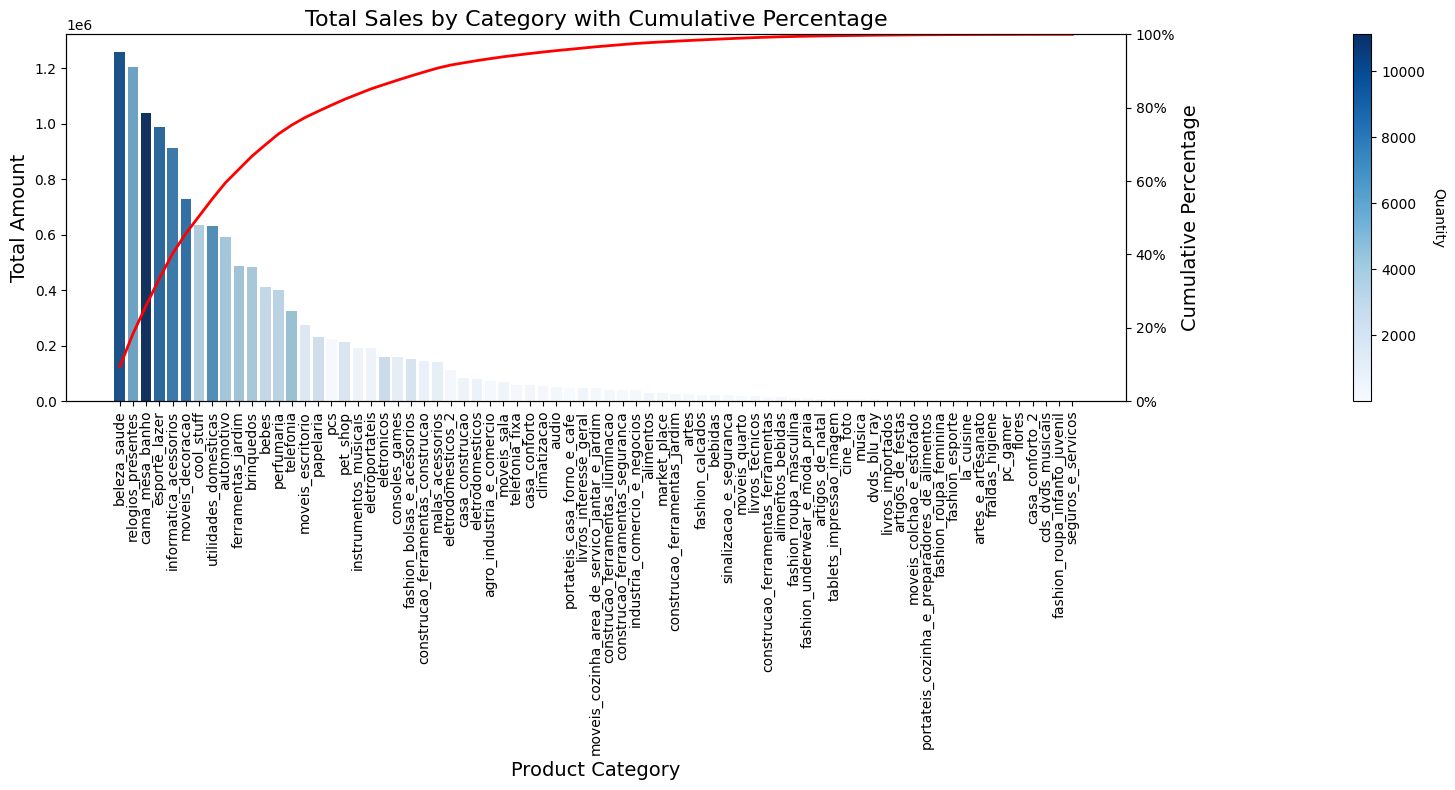

In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 按照total_amount进行降序排序，并选择前20条记录
category_stats_sorted = category_stats.sort_values(by='total_amount', ascending=False)

# 计算颜色映射
norm = plt.Normalize(category_stats_sorted['quantity'].min(), category_stats_sorted['quantity'].max())
sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
sm.set_array([])

# 计算累积总金额的百分比
category_stats_sorted['cumulative_total_amount'] = category_stats_sorted['total_amount'].cumsum()
category_stats_sorted['cumulative_percentage'] = (category_stats_sorted['cumulative_total_amount'] / 
                                                  category_stats_sorted['total_amount'].sum()) * 100

plt.figure(figsize=(16, 8))

# 创建自定义调色板
colors = norm(category_stats_sorted['quantity'].values)
category_colors = plt.cm.Blues(colors)

# 创建条形图
barplot = sns.barplot(
    x='product_category_name',
    y='total_amount', 
    data=category_stats_sorted, 
    palette=category_colors
)

# 设置图表标题和标签
plt.title('Total Sales by Category with Cumulative Percentage', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Amount', fontsize=14)
plt.xticks(rotation=90)

# 在条形图上叠加折线图
ax2 = plt.twinx()
ax2.plot(category_stats_sorted['product_category_name'], category_stats_sorted['cumulative_percentage'], 
         color='r', marker='', linestyle='-', linewidth=2)
ax2.set_ylabel('Cumulative Percentage', fontsize=14)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
ax2.set_ylim(0, 100)

# 创建颜色条
cbar = plt.colorbar(sm, ax=plt.gca(), pad=0.15)
cbar.set_label('Quantity', rotation=270, labelpad=15)

# 调整布局以避免重叠
plt.tight_layout()

# 保存图表为PNG文件
plt.savefig('./figure/cat_amount_quantity.png')

# 显示图表
plt.show()


### RFM分析

In [74]:
rfm = pd.read_csv('./OlistData/rfm.csv')
rfm

,customer_unique_id,recency,frequency,monetary,R_score,F_score,M_score,RFM_score,customer_type
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90,1,0,0,100,Average Potential Customer
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19,1,0,0,100,Average Potential Customer
2,0000f46a3911fa3c0805444483337064,586,1,86.22,0,0,0,0,Average At Risk Customer
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62,0,0,0,0,Average At Risk Customer
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.89,0,0,0,0,Average At Risk Customer
...,...,...,...,...,...,...,...,...,...
93391,fffcf5a5ff07b0908bd4e2dbc735a684,496,2,4134.84,0,1,1,11,Loyal Customer
93392,fffea47cd6d3cc0a88bd621562a9d061,311,1,84.58,0,0,0,0,Average At Risk Customer
93393,ffff371b4d645b6ecea244b27531430a,617,1,112.46,0,0,0,0,Average At Risk Customer
93394,ffff5962728ec6157033ef9805bacc48,168,1,133.69,1,0,0,100,Average Potential Customer


#### type 分布饼图

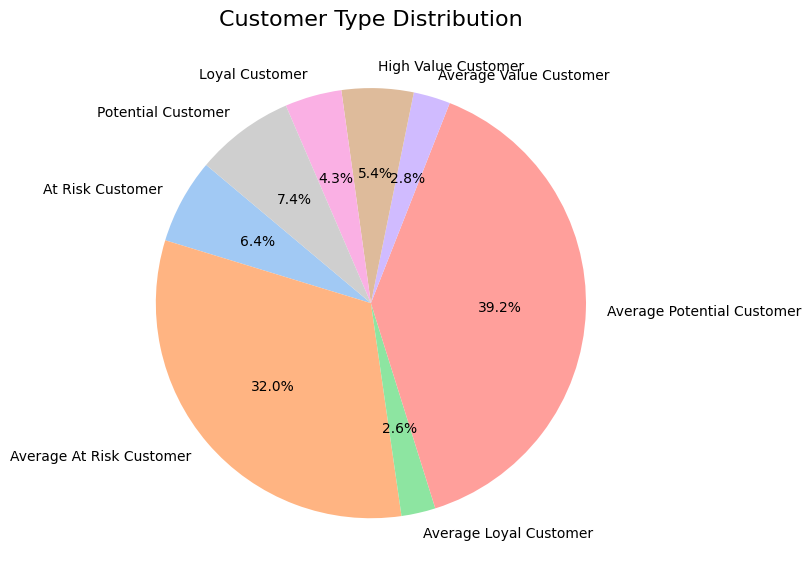

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设rfm是已经存在的DataFrame
# rfm = pd.read_csv("your_data.csv")  # 如果数据来自CSV文件

# 按照customer_type统计数量
data = rfm.groupby('customer_type').size().reset_index(name='count')

# 创建饼图
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')[0:len(data)]  # 使用Seaborn的调色板

# 绘制饼图
plt.pie(data['count'], labels=data['customer_type'], autopct='%1.1f%%', colors=colors, startangle=140)

# 设置标题
plt.title('Customer Type Distribution', fontsize=16)

# 显示图表
plt.tight_layout()
plt.savefig('./figure/customer_type_pie_chart.png')
plt.show()

#### 不同类型用户消费贡献

In [75]:
orders_with_unique_id = orders.merge(customers, on='customer_id', how='left')
orders_with_unique_id = orders_with_unique_id[['order_id', 'customer_unique_id', 'customer_state']]
orders_with_unique_id

,order_id,customer_unique_id,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,SP
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,BA
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,SP
...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,6359f309b166b0196dbf7ad2ac62bb5a,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,da62f9e57a76d978d02ab5362c509660,SP
99438,83c1379a015df1e13d02aae0204711ab,737520a9aad80b3fbbdad19b66b37b30,BA
99439,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,RJ


In [76]:
order_with_price = orders_with_unique_id.merge(payments, on='order_id', how='left')
order_with_price_type = order_with_price.merge(rfm, on='customer_unique_id', how='left')
order_with_price_type = order_with_price_type[['order_id', 'customer_unique_id', 'customer_state', 'payment_type', 'payment_installments', 'payment_value', 'customer_type']]
order_with_price_type

,order_id,customer_unique_id,customer_state,payment_type,payment_installments,payment_value,customer_type
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,SP,credit_card,1.0,18.12,Average Loyal Customer
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,SP,voucher,1.0,2.00,Average Loyal Customer
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,SP,voucher,1.0,18.59,Average Loyal Customer
3,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,BA,boleto,1.0,141.46,Average Potential Customer
4,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,GO,credit_card,3.0,179.12,Average Potential Customer
...,...,...,...,...,...,...,...
103882,9c5dedf39a927c1b2549525ed64a053c,6359f309b166b0196dbf7ad2ac62bb5a,SP,credit_card,3.0,85.08,Average At Risk Customer
103883,63943bddc261676b46f01ca7ac2f7bd8,da62f9e57a76d978d02ab5362c509660,SP,credit_card,3.0,195.00,Average Potential Customer
103884,83c1379a015df1e13d02aae0204711ab,737520a9aad80b3fbbdad19b66b37b30,BA,credit_card,5.0,271.01,At Risk Customer
103885,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,RJ,credit_card,4.0,441.16,High Value Customer


In [77]:
print(order_with_price_type.columns.to_list())

['order_id', 'customer_unique_id', 'customer_state', 'payment_type', 'payment_installments', 'payment_value', 'customer_type']


In [ ]:
importance_rank = ['High Value Customer', 'Loyal Customer', ]

def rfm_segmentation(df):
    if df['RFM_score'] == '111':
        return 'High Value Customer'
    elif df['RFM_score'] == '101':
        return 'Potential Customer'
    elif df['RFM_score'] == '011':
        return 'Loyal Customer'
    elif df['RFM_score'] == '001':
        return 'At Risk Customer'
    elif df['RFM_score'] == '110':
        return 'Average Value Customer'
    elif df['RFM_score'] == '100':
        return 'Average Potential Customer'
    elif df['RFM_score'] == '010':
        return 'Average Loyal Customer'
    elif df['RFM_score'] == '000':
        return 'Average At Risk Customer'

C:\Users\18205\AppData\Local\Temp\ipykernel_12912\1962116193.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
C:\Users\18205\AppData\Local\Temp\ipykernel_12912\1962116193.py:20: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  barplot = sns.barplot(


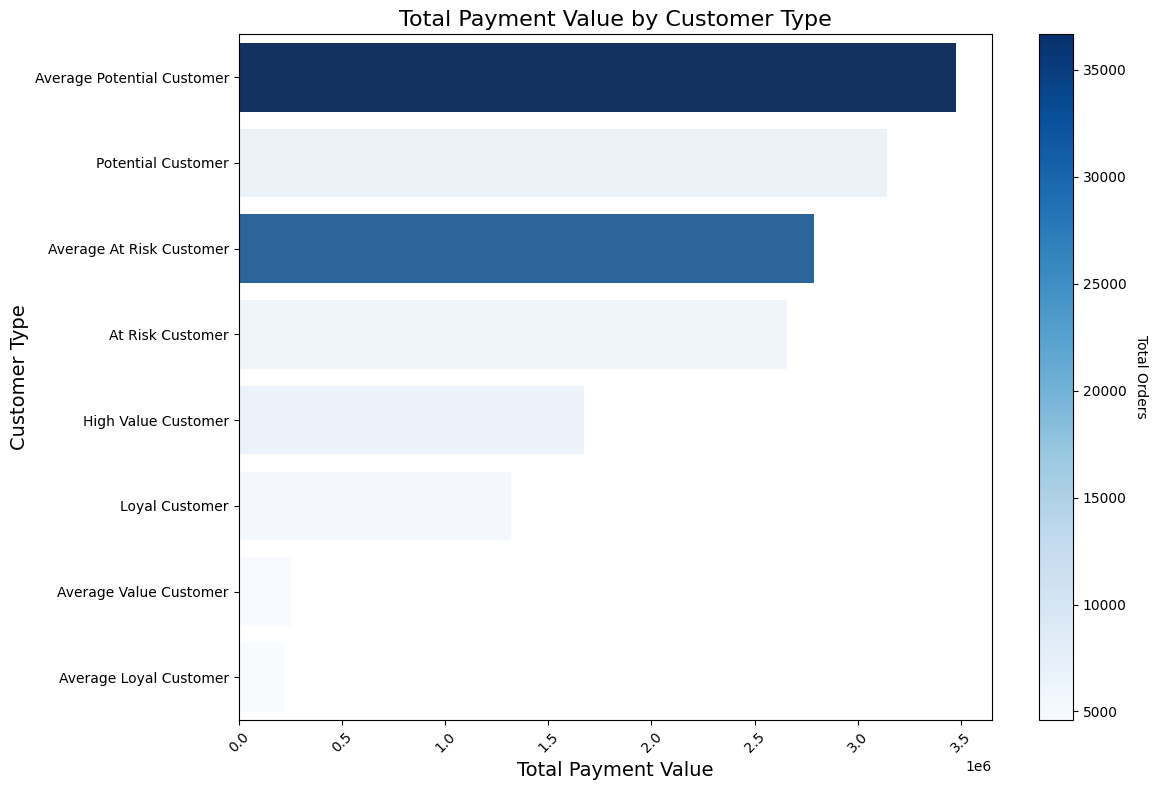

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# 计算不同customer_type下的总订单数和payment_value
customer_stats = order_with_price_type.groupby('customer_type').agg(
    total_orders=('order_id', 'size'),
    total_payment_value=('payment_value', 'sum')
).reset_index()

# 按照total_payment_value进行降序排序
customer_stats_sorted = customer_stats.sort_values(by='total_payment_value', ascending=False)

# 计算颜色映射
norm = plt.Normalize(customer_stats_sorted['total_orders'].min(), customer_stats_sorted['total_orders'].max())
colors = plt.cm.Blues(norm(customer_stats_sorted['total_orders'].values))

plt.figure(figsize=(12, 8))

# 创建条形图
barplot = sns.barplot(
    x='total_payment_value',
    y='customer_type',
    data=customer_stats_sorted,
    palette=colors
)

# 设置图表标题和标签
plt.title('Total Payment Value by Customer Type', fontsize=16)
plt.xlabel('Total Payment Value', fontsize=14)
plt.ylabel('Customer Type', fontsize=14)

# 创建颜色条
sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Total Orders', rotation=270, labelpad=15)

# 旋转标签，增加条形间隔
plt.xticks(rotation=45)
plt.tight_layout()

# 保存图表为PNG文件
plt.savefig('./figure/customer_type_payment_value.png')

# 显示图表
plt.show()


### MAP

In [6]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [27]:
brazil_states = {
    'SP': 'São Paulo',
    'RN': 'Rio Grande do Norte',
    'AC': 'Acre',
    'RJ': 'Rio de Janeiro',
    'ES': 'Espírito Santo',
    'MG': 'Minas Gerais',
    'BA': 'Bahia',
    'SE': 'Sergipe',
    'PE': 'Pernambuco',
    'AL': 'Alagoas',
    'PB': 'Paraíba',
    'CE': 'Ceará',
    'PI': 'Piauí',
    'MA': 'Maranhão',
    'PA': 'Pará',
    'AP': 'Amapá',
    'AM': 'Amazonas',
    'RR': 'Roraima',
    'DF': 'Distrito Federal',
    'GO': 'Goiás',
    'RO': 'Rondônia',
    'TO': 'Tocantins',
    'MT': 'Mato Grosso',
    'MS': 'Mato Grosso do Sul',
    'RS': 'Rio Grande do Sul',
    'PR': 'Paraná',
    'SC': 'Santa Catarina'
}


In [64]:
city_geo = geolocation.groupby('geolocation_city').agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean'
}).reset_index()

In [43]:
orders['date'] = pd.to_datetime(orders['order_purchase_timestamp']).dt.date
orders['date'] = orders['date'].astype(str)
order_date = orders[orders['date'] == '2017-11-24']

In [44]:
order_customer = order_date.merge(customers, on='customer_id', how='left')
order_customer = order_customer[['order_id', 'customer_id', 'customer_unique_id', 'date',
                                 'customer_city', 'customer_city', 'customer_state']]

In [81]:
order_geo = order_customer.merge(city_geo, left_on='customer_city', right_on='geolocation_city', how='left')
order_geo = order_geo[['order_id', 'customer_id', 'date', 'customer_city',
                       'customer_state', 'geolocation_lat', 'geolocation_lng', 'geolocation_city']]
order_geo = order_geo.drop_duplicates(subset='order_id')
order_geo = order_geo.dropna()

In [82]:
order_geo

,order_id,customer_id,date,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city
0,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,2017-11-24,presidente venceslau,SP,-21.874288,-51.844970,presidente venceslau
1,b01875821b8dcb6abc61776f0f971bce,818596f5b68adfe2c11498ebb6d39e02,2017-11-24,rio de janeiro,RJ,-22.914910,-43.312883,rio de janeiro
2,c263211bd219538f7c031591e87ef0d7,ed8c52327eecff596e141636d5b556d2,2017-11-24,pato branco,PR,-26.229265,-52.675247,pato branco
3,fb9b2930f4a30f96c7cc98eaaa85e5f0,02ed2cff54eb047cdbe79dd0535945d4,2017-11-24,sao paulo,SP,-23.570860,-46.633242,sao paulo
4,52e5445828db681d83dccb33a15ecac4,d42ee2c04270ba237933c8bdd5e1c761,2017-11-24,santo amaro,BA,-12.252349,-38.841546,santo amaro
...,...,...,...,...,...,...,...,...
1171,82a7cba8d70a10e7e0e44e41a30772f7,5e6283cd338ed4776861535ddee19b20,2017-11-24,osasco,SP,-23.536561,-46.788284,osasco
1172,b93b079468bdf6a20fd54cf45d1e03b6,e570debfd69192cdd2e846ae00869a33,2017-11-24,casimiro de abreu,RJ,-22.487614,-42.190020,casimiro de abreu
1173,efe279abeb0fb2d03273c495d19b9f29,a0973c8c7e186a3e7425bb1ae01b0c9c,2017-11-24,itabuna,BA,-14.795188,-39.276487,itabuna
1174,d81e1aea4814c6e5744458bcd1f94693,70d1caf284f34ea4ee405e25edba63f5,2017-11-24,belo horizonte,MG,-19.908772,-43.957549,belo horizonte


In [25]:
geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [47]:
state_geo = geolocation.groupby('geolocation_state').agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean'
}).reset_index()
state_geo

,geolocation_state,geolocation_lat,geolocation_lng
0,AC,-9.702555,-68.451852
1,AL,-9.599729,-36.052017
2,AM,-3.349336,-60.537430
3,AP,0.086025,-51.234304
4,BA,-13.049361,-39.560649
5,CE,-4.363151,-39.004140
6,DF,-15.810885,-47.969630
7,ES,-20.105145,-40.503183
8,GO,-16.577645,-49.334195
9,MA,-3.798997,-44.818627


In [83]:
import folium
from folium import plugins
from folium.features import DivIcon

# Your original map data
order_map = folium.Map(location=[order_geo['geolocation_lat'].mean(),
                                 order_geo['geolocation_lng'].mean()],
                       zoom_start=10, control_scale=True)
folium.GeoJson('br_states.json', name='Brazil States').add_to(order_map)

# Marker cluster for individual points
marker_cluster = plugins.MarkerCluster().add_to(order_map)

# Add markers to the map
for name, row in order_geo.iterrows():
    folium.Marker(location=[row["geolocation_lat"], row["geolocation_lng"]]).add_to(marker_cluster)

# Custom title as HTML
title_html = '''
    <h3 align="center" style="font-size:20px"><b>Order's Distribution on 2017-11-24</b></h3>
'''
order_map.get_root().html.add_child(folium.Element(title_html))


# Add state names to the map
for idx, row in state_geo.iterrows():
    folium.map.Marker(
        [row['geolocation_lat'], row['geolocation_lng']],
        icon=DivIcon(
            icon_size=(150, 36),
            icon_anchor=(0, 0),
            html=f'<div style="font-size: 12pt">{brazil_states[row["geolocation_state"]]}</div>',
        )
    ).add_to(order_map)

# Save the map
order_map.save('order_map3.html')


### Seller map

In [52]:
geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [65]:
city_geo

,geolocation_city,geolocation_lat,geolocation_lng
0,* cidade,-25.571748,-49.334374
1,...arraial do cabo,-22.969370,-42.029834
2,4o. centenario,-24.271860,-53.069433
3,4º centenario,-24.279801,-53.074723
4,abadia de goias,-16.767063,-49.438089
...,...,...,...
8006,áurea,-27.695009,-52.055076
8007,ângulo,-23.195024,-51.917294
8008,érico cardoso,-13.393047,-42.134282
8009,óbidos,-1.907183,-55.516370


In [59]:
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [70]:
sellers_geo = sellers.merge(city_geo, left_on='seller_city', right_on='geolocation_city', how='left')
sellers_geo =sellers_geo.dropna(subset='geolocation_lat')
sellers_geo =sellers_geo.dropna(subset='geolocation_lng')
sellers_geo =sellers_geo.dropna(subset='seller_state')


sellers_geo

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_city,geolocation_lat,geolocation_lng
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,campinas,-22.900861,-47.068536
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,mogi guacu,-22.358388,-46.940644
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,rio de janeiro,-22.914910,-43.312883
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,sao paulo,-23.570860,-46.633242
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,braganca paulista,-22.948420,-46.541315
...,...,...,...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR,sarandi,-24.941032,-52.223318
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC,palhoca,-27.660747,-48.667571
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP,sao paulo,-23.570860,-46.633242
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,pelotas,-31.751269,-52.337362


In [73]:
import folium
from folium import plugins
from folium.features import DivIcon

# Your original map data
order_map = folium.Map(location=[sellers_geo['geolocation_lat'].mean(),
                                 sellers_geo['geolocation_lng'].mean()],
                       zoom_start=10, control_scale=True)
folium.GeoJson('br_states.json', name='Brazil States').add_to(order_map)

# Marker cluster for individual points
marker_cluster = plugins.MarkerCluster().add_to(order_map)

# Add markers to the map
for name, row in sellers_geo.iterrows():
    folium.Marker(location=[row["geolocation_lat"], row["geolocation_lng"]]).add_to(marker_cluster)

# Custom title as HTML
title_html = '''
    <h3 align="center" style="font-size:20px"><b>Seller's Distribution</b></h3>
'''
order_map.get_root().html.add_child(folium.Element(title_html))


# Add state names to the map
for idx, row in state_geo.iterrows():
    folium.map.Marker(
        [row['geolocation_lat'], row['geolocation_lng']],
        icon=DivIcon(
            icon_size=(150, 36),
            icon_anchor=(0, 0),
            html=f'<div style="font-size: 12pt">{brazil_states[row["geolocation_state"]]}</div>',
        )
    ).add_to(order_map)

# Save the map
order_map.save('sellers_map.html')


### RFM分布

In [103]:
rfm_reduce = rfm[['customer_unique_id', 'customer_type']]
rfm_city = rfm_reduce.merge(customers, on='customer_unique_id', how='left')
rfm_city = rfm_city[['customer_unique_id', 'customer_type', 'customer_city', 'customer_state']]
rfm_city = rfm_city.dropna()
rfm_geo = rfm_city.merge(city_geo, left_on='customer_city', right_on='geolocation_city', how='left').dropna()

In [106]:
rfm_geo

,customer_unique_id,customer_type,customer_city,customer_state,geolocation_city,geolocation_lat,geolocation_lng
0,0000366f3b9a7992bf8c76cfdf3221e2,Average Potential Customer,cajamar,SP,cajamar,-23.369587,-46.842322
1,0000b849f77a49e4a4ce2b2a4ca5be3f,Average Potential Customer,osasco,SP,osasco,-23.536561,-46.788284
2,0000f46a3911fa3c0805444483337064,Average At Risk Customer,sao jose,SC,sao jose,-27.580259,-48.631961
3,0000f6ccb0745a6a4b88665a16c9f078,Average At Risk Customer,belem,PA,belem,-1.452536,-48.391746
4,0004aac84e0df4da2b147fca70cf8255,Average At Risk Customer,sorocaba,SP,sorocaba,-23.485346,-47.464450
...,...,...,...,...,...,...,...
96713,fffcf5a5ff07b0908bd4e2dbc735a684,Loyal Customer,sanharo,PE,sanharo,-8.362623,-36.562478
96714,fffea47cd6d3cc0a88bd621562a9d061,Average At Risk Customer,feira de santana,BA,feira de santana,-12.250013,-38.956962
96715,ffff371b4d645b6ecea244b27531430a,Average At Risk Customer,sinop,MT,sinop,-11.858332,-55.508463
96716,ffff5962728ec6157033ef9805bacc48,Average Potential Customer,bom jesus do norte,ES,bom jesus do norte,-21.126568,-41.672806


In [107]:
rfm_types = rfm_geo['customer_type'].unique().tolist()
rfm_types

['Average Potential Customer',
 'Average At Risk Customer',
 'High Value Customer',
 'Average Loyal Customer',
 'Loyal Customer',
 'Average Value Customer',
 'At Risk Customer',
 'Potential Customer']

In [108]:
import folium
from folium import plugins
from folium.features import DivIcon

# Your original map data
order_map = folium.Map(location=[city_geo['geolocation_lat'].mean(),
                                 city_geo['geolocation_lng'].mean()],
                       zoom_start=5, control_scale=True)  # Adjust zoom_start as needed
folium.GeoJson('br_states.json', name='Brazil States').add_to(order_map)

# Custom title as HTML
title_html = '''
    <h3 align="center" style="font-size:20px"><b>Different Customer Types Distribution</b></h3>
'''
order_map.get_root().html.add_child(folium.Element(title_html))

# Add state names to the map
for idx, row in state_geo.iterrows():
    folium.map.Marker(
        [row['geolocation_lat'], row['geolocation_lng']],
        icon=DivIcon(
            icon_size=(150, 36),
            icon_anchor=(0, 0),
            html=f'<div style="font-size: 12pt">{brazil_states[row["geolocation_state"]]}</div>',
        )
    ).add_to(order_map)

# Create a FeatureGroup for each customer type and add it to the map
for index, rfm_type in enumerate(rfm_types):
    df_tmp = rfm_geo[rfm_geo['customer_type'] == rfm_type]
    
    # Create a FeatureGroup for this customer type
    fg = folium.FeatureGroup(name=rfm_type).add_to(order_map)
    
    # Add markers to the FeatureGroup
    marker_cluster = plugins.MarkerCluster().add_to(fg)
    for name, row in df_tmp.iterrows():
        folium.Marker(location=[row["geolocation_lat"], row["geolocation_lng"]]).add_to(marker_cluster)

# Add layer control to the map
folium.LayerControl().add_to(order_map)

# Save the map
order_map.save('type_map.html')
